### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ву Ньят Нам
##### Группа:   НПИбд-01-17


## Москва 2020

### Вариант № 24


MAGIC Gamma Telescope Data Set  

Название файла: magic04.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope  

Класс: class (столбец No 11) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Считайте из заданного набора данных репозитария UCI 

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data", header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
#метки класса
df[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

In [4]:
df = df.replace('g',1)
df = df.replace('h',2)

In [5]:
df[10].value_counts()

1    12332
2     6688
Name: 10, dtype: int64

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,2
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,2
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,2
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,2


### 2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19020 non-null  float64
 1   1       19020 non-null  float64
 2   2       19020 non-null  float64
 3   3       19020 non-null  float64
 4   4       19020 non-null  float64
 5   5       19020 non-null  float64
 6   6       19020 non-null  float64
 7   7       19020 non-null  float64
 8   8       19020 non-null  float64
 9   9       19020 non-null  float64
 10  10      19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(), '\n')

0
24.8332     3
19.1572     3
26.9187     3
12.9176     3
20.7522     3
           ..
18.2881     1
22.9990     1
32.0543     1
138.1440    1
25.0000     1
Name: 0, Length: 18643, dtype: int64 

1
0.0000     98
10.7539     4
17.6852     3
11.9517     3
17.2814     3
           ..
5.7734      1
10.2416     1
23.9565     1
15.9470     1
25.5658     1
Name: 1, Length: 18200, dtype: int64 

2
2.1508    27
2.0774    24
2.1287    24
2.1319    23
2.1414    22
          ..
2.3469     1
2.8082     1
3.3130     1
3.0323     1
3.4972     1
Name: 2, Length: 7228, dtype: int64 

3
0.6000    16
0.4116    12
0.4000    12
0.2979    12
0.2175    11
          ..
0.6587     1
0.0245     1
0.6207     1
0.8165     1
0.5213     1
Name: 3, Length: 6410, dtype: int64 

4
0.1940    18
0.1939    16
0.2126    16
0.2000    16
0.2251    15
          ..
0.4369     1
0.5505     1
0.0274     1
0.3665     1
0.3892     1
Name: 4, Length: 4421, dtype: int64 

5
 0.0000     41
-0.0001      7
 7.1088      3
 8.8077      3

### 3.	Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не более 10).  

In [9]:
X = df.drop(10, axis=1).values
y = df[10].values

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666, n_jobs=-1)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, n_estimators=500, n_jobs=-1,
                     oob_score=True, random_state=666)

In [11]:
feats_importance = et_clf.feature_importances_
print(feats_importance)

[0.12601726 0.10653608 0.10512908 0.06688286 0.06074617 0.06157779
 0.08471689 0.0571614  0.26050892 0.07072356]


In [12]:
for idx, i in enumerate(feats_importance>0.106):
    if i==False:
        df.drop(idx, axis=1, inplace=True)

In [13]:
df

,0,1,8,10
0,28.7967,16.0021,40.0920,1
1,31.6036,11.7235,6.3609,1
2,162.0520,136.0310,76.9600,1
3,23.8172,9.5728,10.4490,1
4,75.1362,30.9205,4.6480,1
...,...,...,...,...
19015,21.3846,10.9170,2.4229,2
19016,28.9452,6.7020,86.7975,2
19017,75.4455,47.5305,30.2987,2
19018,120.5135,76.9018,84.6874,2


### 4.  Разбейте набор данных на обучающую и тестовую выборки.

In [14]:
X = df.drop(10, axis=1).values
y = df[10].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state
=666, shuffle=True)

### 5.	Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений.

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
dt_clf.score(X_test, y_test)

0.7811076060287416

In [18]:
dt_clf.feature_importances_

array([0.4232802, 0.       , 0.5767198])

In [19]:
X_train = X_train[:, [2, 2]]
X_test = X_test[:, [2, 2]]
X = X[:, [2, 2]]

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  
dt_clf.fit(X_train, y_train);
print('accuracy:', dt_clf.score(X_test, y_test))

accuracy: 0.7302839116719243


In [21]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], 100).reshape(-1, 1),
        np.linspace(axis[2], axis[3], 100).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

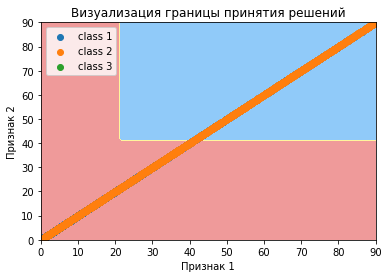

In [22]:
plot_decision_boundary(dt_clf, axis=[X_test[:, 0].min(), X_test[:, 0].max(), X_test[:, 1].min(), X_test[:, 1].max()])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], label='class 2')
plt.scatter(X_test[y_test==3,0], X_test[y_test==3,1], label='class 3')
plt.title('Визуализация границы принятия решений')
plt.xlabel("Признак 1",fontsize=10)
plt.ylabel("Признак 2",fontsize=10)
plt.legend()
plt.show()

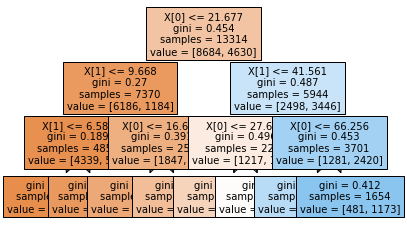

In [23]:
from sklearn.tree import plot_tree

plot_tree(dt_clf, fontsize=10, filled=True); 

### 6. 	Постройте на основе классификатора деревьев решений ансамблевые классификаторы: 
  * BaggingClassifier, 
  * RandomForestClassifier,
  * AdaBoostClassifier, 
  
    подберите параметры ансамблевых классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений ансамблевых классификаторов. 

### BaggingClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=1000, max_samples=0.3,
                               bootstrap=True, oob_score=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.3,
                  n_estimators=1000, n_jobs=-1, oob_score=True)

In [25]:
bagging_clf.score(X_test, y_test)

0.7013669821240799

In [26]:
bagging_clf.oob_score_

0.7047468829803215

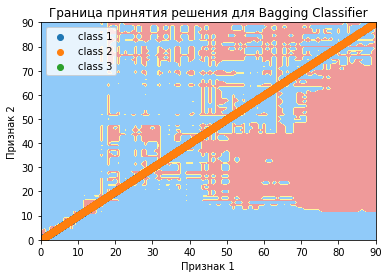

In [27]:
plot_decision_boundary(bagging_clf, axis=[X_test[:, 0].min(), X_test[:, 0].max(), X_test[:, 1].min(), X_test[:, 1].max()])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], label='class 2')
plt.scatter(X_test[y_test==3,0], X_test[y_test==3,1], label='class 3')
plt.title('Граница принятия решения для Bagging Classifier')
plt.xlabel("Признак 1",fontsize=10)
plt.ylabel("Признак 2",fontsize=10)
plt.legend()
plt.show()

### RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, oob_score=True,\
                                random_state=666, n_jobs=-1, min_samples_leaf=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=666)

In [29]:
rf_clf.score(X_test, y_test)

0.6959341044514546

In [30]:
rf_clf.oob_score_

0.695884031846177

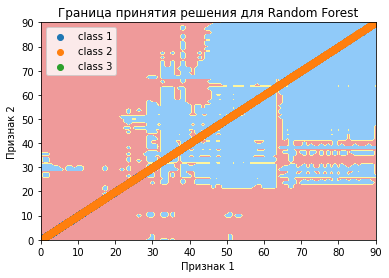

In [31]:
plot_decision_boundary(rf_clf, axis=[X_test[:, 0].min(), X_test[:, 0].max(), X_test[:, 1].min(), X_test[:, 1].max()])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], label='class 2')
plt.scatter(X_test[y_test==3,0], X_test[y_test==3,1], label='class 3')
plt.title('Граница принятия решения для Random Forest')
plt.xlabel("Признак 1",fontsize=10)
plt.ylabel("Признак 2",fontsize=10)
plt.legend()
plt.show()

### AdaBoostClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=1000)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.647739221871714

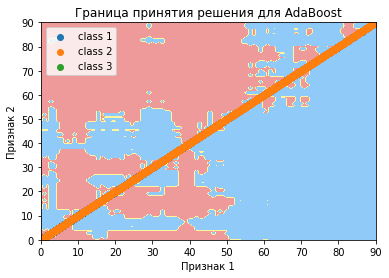

In [33]:
plot_decision_boundary(ada_clf, axis=[X_test[:, 0].min(), X_test[:, 0].max(), X_test[:, 1].min(), X_test[:, 1].max()])
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], label='class 2')
plt.scatter(X_test[y_test==3,0], X_test[y_test==3,1], label='class 3')
plt.title('Граница принятия решения для AdaBoost')
plt.xlabel("Признак 1",fontsize=10)
plt.ylabel("Признак 2",fontsize=10)
plt.legend()
plt.show()

### 7. 	Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации. 

In [34]:
print(bagging_clf.score(X_test, y_test))
print(rf_clf.score(X_test, y_test))
print(ada_clf.score(X_test, y_test))

0.7013669821240799
0.6959341044514546
0.647739221871714


Наиболее высокую точность классификации дает BaggingClassifier = 0.7013